### Manual experimentation: Linear regression only with pandas

In [168]:
# pip install numpy
# pip install pandas
# pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [169]:
# these are the phone data as in the materials
# x => screen time in minutes
# y => % of battery used
phones = {
    "x": [568, 341, 609, 477, 511],
    "y": [75, 46, 87, 59, 61]
}

# convert the dictionary into pandas DataFrame
df = pd.DataFrame.from_dict(phones)
df

,x,y
0,568,75
1,341,46
2,609,87
3,477,59
4,511,61


In [170]:
# let's calculate the means / averages
# we need these later when we solve the linear regression formula
x_mean = df['x'].mean()
y_mean = df['y'].mean()

In [171]:
print(x_mean, y_mean)

501.2 65.6


In [172]:
# let's calcaulte the differences of x and y regarding the average x/y -point
df['x-diff'] = df['x'] - x_mean
df['y-diff'] = df['y'] - y_mean

In [173]:
df

,x,y,x-diff,y-diff
0,568,75,66.8,9.4
1,341,46,-160.2,-19.6
2,609,87,107.8,21.4
3,477,59,-24.2,-6.6
4,511,61,9.8,-4.6


In [174]:
# create two more variables to solve the m in linear regeression
# y^ = mx + b
df['x-diff2'] = df['x-diff'] ** 2
df['xy-diff'] = df['x-diff'] * df['y-diff']

In [175]:
df

,x,y,x-diff,y-diff,x-diff2,xy-diff
0,568,75,66.8,9.4,4462.24,627.92
1,341,46,-160.2,-19.6,25664.04,3139.92
2,609,87,107.8,21.4,11620.84,2306.92
3,477,59,-24.2,-6.6,585.64,159.72
4,511,61,9.8,-4.6,96.04,-45.08


In [176]:
# let's get the sums and finally solve m in the equation
xy_diff_total = df['xy-diff'].sum()
x2_diff_total = df['x-diff2'].sum()

# solve m by using least squares method
m = xy_diff_total / x2_diff_total
m

np.float64(0.1458773286069839)

In [177]:
# round to three decimals so we can compare the result to materials
m = float(round(m, 3))
m

0.146

In [178]:
# solve b by using the average point
b = y_mean - m * x_mean
b

np.float64(-7.575199999999995)

In [179]:
b = float(round(b, 2))
b

-7.58

In [180]:
# this means the final formula for the linear regression
# and this particular data is:
text = f"y^ = {m} * x + {b}"
text

'y^ = 0.146 * x + -7.58'

### Let's ask a simple visualization from ChatGPT...

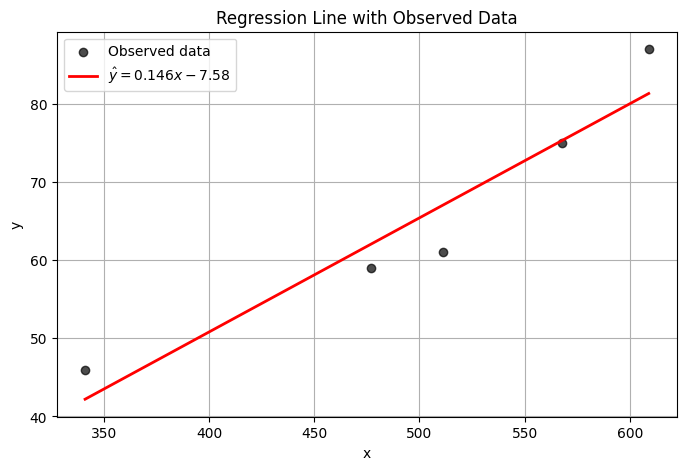

In [181]:
import numpy as np
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'x': [...], 'y': [...]})

# Regression function
def y_hat(x):
    return 0.146 * x - 7.58

# Generate x range based on data
x_line = np.linspace(df['x'].min(), df['x'].max(), 100)
y_line = y_hat(x_line)

# Plot
plt.figure(figsize=(8, 5))

# Scatter plot of actual data
plt.scatter(df['x'], df['y'], color='black', alpha=0.7, label='Observed data')

# Regression line
plt.plot(x_line, y_line, color='red', linewidth=2,
         label=r'$\hat{y} = 0.146x - 7.58$')

# Labels and styling
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Line with Observed Data')
plt.legend()
plt.grid(True)

plt.show()
